<a href="https://colab.research.google.com/github/Satvik256/TestRepo/blob/master/salary_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
import seaborn as sns

In [0]:
from fastai.vision import *

In [0]:
from google.colab import files

In [0]:
from fastai.tabular import *

In [0]:
path = untar_data(URLs.ADULT_SAMPLE)

In [0]:
df=pd.read_csv(path/'adult.csv')

In [25]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
education-num     float64
marital-status     object
occupation         object
relationship       object
race               object
sex                object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
salary             object
dtype: object

In [26]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,49,Private,101320,Assoc-acdm,12.0,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States,>=50k
1,44,Private,236746,Masters,14.0,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States,>=50k
2,38,Private,96185,HS-grad,NaN,Divorced,NaN,Unmarried,Black,Female,0,0,32,United-States,<50k
3,38,Self-emp-inc,112847,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>=50k
4,42,Self-emp-not-inc,82297,7th-8th,NaN,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,50,United-States,<50k


In [0]:
categories=['workclass','education','marital-status','occupation','relationship','race','sex','native-country']
continous=['education-num','fnlwgt','age','capital-gain','capital-loss','hours-per-week']

In [0]:
procedures=[FillMissing,Categorify,Normalize]

In [0]:
valid_set=range(len(df)-2000,len(df))

In [0]:
data=TabularDataBunch.from_df(path,df,'salary',valid_idx=valid_set,procs=procedures,cat_names=categories,cont_names=continous)

In [32]:
data.show_batch(rows=5)

workclass,education,marital-status,occupation,relationship,race,sex,native-country,education-num_na,education-num,fnlwgt,age,capital-gain,capital-loss,hours-per-week,target
Self-emp-not-inc,HS-grad,Married-civ-spouse,Other-service,Husband,White,Male,United-States,False,-0.4216,-1.5584,1.3456,-0.1459,-0.2168,1.5800,<50k
Private,Some-college,Married-civ-spouse,Sales,Husband,White,Male,United-States,False,-0.0297,-0.5842,-0.0457,-0.1459,-0.2168,1.5800,<50k
Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,False,-0.4216,0.4923,-1.3638,-0.1459,-0.2168,-0.0358,<50k
?,HS-grad,Married-civ-spouse,?,Husband,White,Male,United-States,False,-0.4216,-0.0945,1.6385,-0.1459,-0.2168,-0.0358,>=50k
Private,7th-8th,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,False,-2.3807,1.5907,-0.7047,-0.1459,-0.2168,-0.0358,<50k


In [0]:
lrn=tabular_learner(data,layers=[200,100],metrics=[accuracy,error_rate])

In [38]:
lrn.lr_find()

epoch,train_loss,valid_loss,accuracy,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


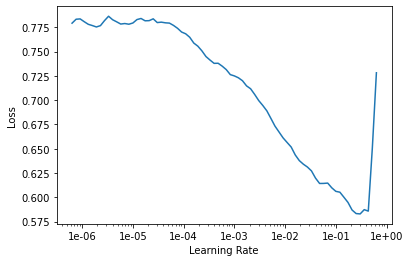

In [39]:
lrn.recorder.plot()

In [40]:
lrn.fit(5,1e-2)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.335414,0.334058,0.843500,0.156500,00:06
1,0.333995,0.318835,0.847500,0.152500,00:06
2,0.323163,0.338461,0.831500,0.168500,00:06
3,0.334248,0.315283,0.844500,0.155500,00:06
4,0.323275,0.316894,0.852500,0.147500,00:06


In [41]:
lrn.predict(df.loc[23])

(Category tensor(0), tensor(0), tensor([0.9876, 0.0124]))

In [0]:
lrn.unfreeze()

epoch,train_loss,valid_loss,accuracy,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


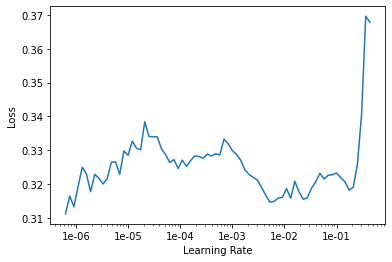

In [43]:
lrn.lr_find()
lrn.recorder.plot()

In [48]:
lrn.fit(10,1e-3)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.323381,0.315011,0.846500,0.153500,00:06
1,0.305855,0.310244,0.851500,0.148500,00:06
2,0.319618,0.315119,0.848500,0.151500,00:06
3,0.311399,0.311590,0.852000,0.148000,00:07
4,0.300099,0.314429,0.851000,0.149000,00:06
5,0.312852,0.316275,0.852500,0.147500,00:07
6,0.311537,0.317847,0.849500,0.150500,00:07
7,0.307284,0.316194,0.848500,0.151500,00:07
8,0.299513,0.316619,0.850500,0.149500,00:06
9,0.299867,0.315779,0.851000,0.149000,00:06
